## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
#Reading data and inputing into a DataFrame
df = pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
#Getting the number of rows in the dataset
df.shape

(294478, 5)

There are 294478 rows in the dataset

c. The number of unique users in the dataset.

In [4]:
#Getting the number of unique users in the dataset
df.user_id.nunique()

290584

There are 290584 unique users in the dataset

d. The proportion of users converted.

In [5]:
#Getting the number of converted users
df.converted.mean()

0.11965919355605512

From the total users, only 11.97% are converted.

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
#Getting the number of times new_page and treatment don't match
df_treatment_not_equal_new_page = df.query('group == "treatment" and landing_page != "new_page"').count(
)
df_new_page_not_equal_treatment = df.query('group != "treatment" and landing_page == "new_page"').count()
df_treatment_not_equal_new_page+df_new_page_not_equal_treatment

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

`new_page` and `treatment` don't match 3893 times.

f. Do any of the rows have missing values?

In [7]:
#Checking if there is any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


There isn't any missing values in the dataset

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
#Getting data that don't match
df_wrong = df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].index

print("Total number of rows in the dataset: ", len(df))
print("Total number of rows that don't match: ",len(df_wrong))

#drop these indices out
df2 = df.drop(df_wrong)

print("Removed rows in df2: ",len(df) - len(df2))
print("New dataset number of rows:", len(df2))

Total number of rows in the dataset:  294478
Total number of rows that don't match:  3893
Removed rows in df2:  3893
New dataset number of rows: 290585


In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
#Getting the number of unique users if df2
df2.user_id.nunique()

290584

There are 290584 unique users in the new dataset

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
#Getting the duplicated user_id in df2
df2[df2.duplicated(subset=['user_id'],keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


The duplicated `user_id` is 773192

c. What is the row information for the repeat **user_id**? 

In [12]:
#Getting again information about the duplicated info in user_id
df2[df2.duplicated(subset=['user_id'],keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


 `user_id` 773192 is duplicated, they have different timestamps

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
#Removing the duplicated line
df2 = df2.drop_duplicates(subset='user_id', keep='first')

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
#Getting the probability of an individual converting regardless the page they receive
geral_probability = df2.query(
    'converted == 1').user_id.nunique() / df2.user_id.nunique()
geral_probability

0.11959708724499628

The probability of an individual to be converted regardless the page they receive is 11.95%

b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
#Getting a separated dataframe of all users that are in control group
control_df = df2.query('group == "control"')

In [16]:
#Getting the probability of an individual from control group to be converted
control_probability = control_df.query(
    'converted == 1').user_id.nunique() / control_df.user_id.nunique()
control_probability

0.1203863045004612

The probability of an individual in `control` group to be converted is 12.04%

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
#Getting a separated dataframe of all users that are in treatment group
treatment_df = df2.query('group == "treatment"')

In [18]:
#Getting the probability of an individual from control group to be converted
treatment_probability = treatment_df.query(
    'converted == 1').user_id.nunique() / treatment_df.user_id.nunique()
treatment_probability

0.11880806551510564

The probability of an individual in `treatment` group to be converted is 11.88%

d. What is the probability that an individual received the new page?

In [19]:
df2.query(
    'landing_page == "new_page"').user_id.nunique() / df2.user_id.nunique()

0.5000619442226688

The probability of an individual received the new page is 50.00%

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

The Probability of converting regardless of page is: 11.96%
Given an user received the control page, the probability of converting is 12.04%, while users that received the treatment page is 11.88%;

The probability of receiving the new page is: 50.00%;

The difference in probabilities of converting in the control group and the treatment group is 0.16% (very close to each other). Altough, such small difference could also appear by chance, we don't have enough  evidence to conclude that the new treatment page leads to more conversions than the old page.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Null hypothesis:**

The null hypothesis is that the new page converts less or equal to the old version:

$H_{0} : P_{new} \leq P_{old}$

**Alternative hypothesis:**

The alternative hypothesis is that the new page converts more than the old version:


$H_{1} : P_{new} \gt P_{old}$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [20]:
#Getting the conversation rate for pnew under the null
p_new = df2.converted.mean()
p_new

0.11959708724499628

The conversation rate for $p_{new}$ under the null is 11.96%

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [21]:
#Getting the conversation rate for pold under the null
p_old = df2.converted.mean()
p_old

0.11959708724499628

The conversation rate for $p_{old}$ under the null is 11.96%

c. What is $n_{new}$, the number of individuals in the treatment group?

In [22]:
n_new = df2.query("group == 'treatment'").user_id.nunique()
n_new

145310

The number of individuals in the treatment group is 145310

d. What is $n_{old}$, the number of individuals in the control group?

In [23]:
n_old = df2.query("group == 'control'").user_id.nunique()
n_old

145274

The number of individuals in the control group is 145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [24]:
new_page_converted = np.random.choice(
    [0, 1], n_new, p=((1 - geral_probability), geral_probability))
new_page_converted

array([1, 0, 0, ..., 0, 0, 1])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [25]:
old_page_converted = np.random.choice(
    [0, 1], n_old, p=((1 - geral_probability), geral_probability))
old_page_converted

array([1, 0, 0, ..., 1, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [26]:
new_page_converted.mean() - old_page_converted.mean()

0.0010646258764073213

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [27]:
p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.choice([0, 1],
                                          n_new,
                                          p=((1 - geral_probability), geral_probability))
    old_page_converted = np.random.choice([0, 1],
                                          n_old,
                                          p=((1 - geral_probability), geral_probability))
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

p_diffs = np.asarray(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

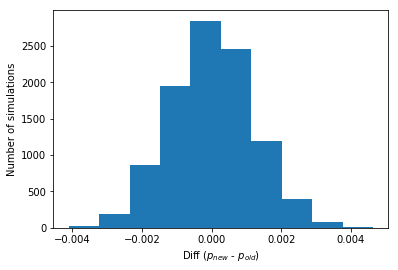

In [28]:
plt.hist(p_diffs)
plt.xlabel("Diff ($p_{new}$ - $p_{old})$")
plt.ylabel("Number of simulations")
plt.show()

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [29]:
#Getting the actual difference observed
obs_diffs = (treatment_probability - control_probability)
obs_diffs

-0.0015782389853555567

In [30]:
#Converting p_diffs to numpy array
p_diffs = np.array(p_diffs)

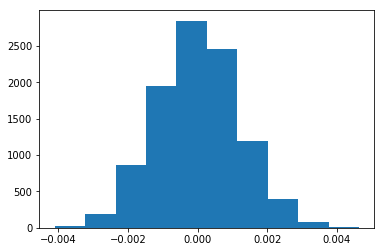

In [31]:
#Plotting distribution
plt.hist(p_diffs);

In [32]:
#Creating distribution under the null hypothesis
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)

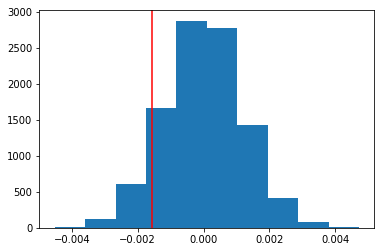

In [33]:
#Plotting the null distribution
plt.hist(null_vals);
#Plotting line for obs_diffs
plt.axvline(obs_diffs, color = 'r')

In [34]:
#Getting the proportion of the p_diffs that are greater than obs_diffs (p value)
(p_diffs > obs_diffs).mean()

0.90590000000000004

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

By the results we can assume that the null hypothesis is true, which  is:

$H_{0} : P_{new} \leq P_{old}$

This conclusion is defined by the calculated the p-value, which is 0.91. That means that in a chance model, the results of our experiment are reproduced 91% of the time. With a Type I error of 0.05, we can say we don't have enough evidence to reject the null hypothesis, because ir oder to accept it, we'd want to an $\alpha$ (alpha) of 0.05 or below.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [35]:
import statsmodels.api as sms

convert_old = df2.query('converted == 1 and landing_page == "old_page"').user_id.nunique()
convert_new = df2.query('converted == 1 and landing_page == "new_page"').user_id.nunique()
n_old = df2.query('landing_page == "old_page"').user_id.nunique()
n_new = df2.query('landing_page == "new_page"').user_id.nunique()

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [36]:
#Calculating the Z-Test
#Used alternativa = smaller, since the alternative hypothesis is p1 < p2 by the model requirements
zscore, p_value = sms.stats.proportions_ztest([convert_old, convert_new],[n_old, n_new],alternative='smaller')
print("Z-Score: ", zscore, "\np-value: ", p_value)

Z-Score:  1.31092419842 
p-value:  0.905058312759


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [37]:
#Getting the critical Z-Score at 95% confidence
from scipy.stats import norm
z_score_critical=norm.ppf(1-(0.05))
z_score_critical

1.6448536269514722

The p-value here are similar with our previous results. Also the calculated Z-Score is smaller than the Critical Z-Score, so we also fail to reject the null hypothesis based on the Z-test.

### Bootstrap Tentative
Although it's not necessary, in the next cells I will try to find the same results using bootstrap the sample data from the entire dataset as a way of using the knowledge from the lessons.

In [38]:
#Creating sampling distribution for difference
old_means, new_means, diffs = [], [], []
size = df2.shape[0]
for _ in range(10000):
    bootsamp = df2.sample(size, replace=True)
    new_mean = bootsamp[bootsamp['landing_page'] ==
                        "new_page"]['converted'].mean()
    old_mean = bootsamp[bootsamp['landing_page'] ==
                        "old_page"]['converted'].mean()

    new_means.append(new_mean)
    old_means.append(old_mean)
    diffs.append(new_mean - old_mean)

In [39]:
#Converting to numpy array
diffs = np.array(diffs)

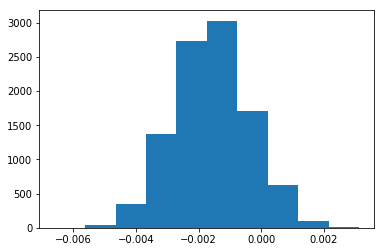

In [40]:
#Plotting the distribution
plt.hist(diffs);

In [41]:
#Creating the distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), diffs.size)

In [42]:
#Getting the actual difference observed
obs_diffs = (treatment_probability - control_probability)
obs_diffs

-0.0015782389853555567

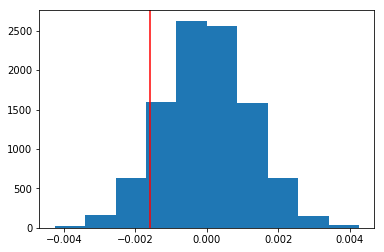

In [44]:
#Plotting the null distribution
plt.hist(null_vals);

#Plotting the line for observed statistic
plt.axvline(obs_diffs, c='red');

In [46]:
#Computing the p_value
(null_vals > obs_diffs).mean()

0.90080000000000005

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Logistic Regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [76]:
#Creating a copy of the df2 dataset
df_log = df2.copy()
df_log.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [77]:
#Adding the intercept
df_log["intercept"] = 1

In [78]:
#Getting dummies and rename
df_log = df_log.join(pd.get_dummies(df_log['group']))
df_log.rename(columns = {"treatment": "ab_page"}, inplace=True)

c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [79]:
#Creating separeted dataframes
df_x = df_log["converted"]
df_y = df_log[["intercept", "ab_page"]]

#Loagind the model
log_mod = sms.Logit(df_x,df_y)

#Fitting the model
mod_fitted = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [80]:
#Checking Results
print(mod_fitted.summary2())

                          Results: Logit
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-07-24 17:52 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074



e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

The p-value associated with ab_page is 0.19, way less than 0.9 we found previously. That happened because we are using two different methods to get those values. While the first one as a one-tailed test, that checked if the experiment group conversions were greater than the null hypothesis conversions, this one is a two-tailed test that checks if they are different from each other. We can use the following expresion to define de Null and the alternativa hypothesis:
$H_{0} : P_{new} = P_{old}$

$H_{1} : P_{new} \neq P_{old}$

Beside the difference in methods, we got the overall same result from both of them, where we reject the null hypothesis because both p-values are above our $\alpha$ (alpha) of 0.05.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Consider other variables in the regression model can be useful to get a more precise outcome with higher accuracy by understanding the relative influence of each variable. Although, we need to be careful about those results because adding more variables can increase the complexity of interpretation and possible problems with multicollinearity.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [81]:
#Checking the countries dataset
df_countries = pd.read_csv("countries.csv")
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [82]:
#Joining the df_log with df_countries
df_log_country = df_log.merge(df_countries, on="user_id", how = "left")
df_log_country.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,US


In [83]:
#Getting dummies from country
country_dummies = pd.get_dummies(df_log_country['country'])
df_log_country = df_log_country.join(country_dummies)
df_log_country.drop(columns = ['country'], inplace=True)
df_log_country.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,ab_page,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,0,0,1


In [84]:
#Creating separeted dataframes
df_country_x = df_log_country["converted"]
df_country_y = df_log_country[["intercept", "ab_page", "CA", "UK"]]

#Loagind the model
log_mod_country = sms.Logit(df_country_x,df_country_y)

#Fitting the model
mod_fitted_country = log_mod_country.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [85]:
#Checking Results
print(mod_fitted_country.summary2())

                          Results: Logit
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-07-24 17:52 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9893    0.0089  -223.7628  0.0000  -2.0067  -1.9718
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
CA           -0.0408    0.0269    -1.5161  0.1295  -0.0934   0.0119
UK            0.0099    0.0133     0.7433  0.4573  -0.0162   0.0359



Base on the p_values we got for the different countries we can also say that there is not enough evidence to reject the null hypothesis that country has no impact on users conversions because all the values did not exceed the 𝛼  (alpha) of 0.05. 

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [86]:
#Creating the interactions between page and country
df_log_country["CA_page"], df_log_country["UK_page"] = df_log_country["CA"] * df_log_country["ab_page"], df_log_country["UK"] * df_log_country["ab_page"]
df_log_country.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,ab_page,CA,UK,US,CA_page,UK_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,0,0,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,0,0,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,0,0,1,0,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,0,0,1,0,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,0,0,1,0,0


In [87]:
#Creating separeted dataframes
df_page_country_x = df_log_country["converted"]
df_page_country_y = df_log_country[["intercept", "ab_page", "CA", "UK", "CA_page", "UK_page"]]

#Loagind the model
log_mod_page_country = sms.Logit(df_page_country_x,df_page_country_y)

#Fitting the model
mod_fitted_page_country = log_mod_page_country.fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [89]:
#Checking Results
print(mod_fitted_page_country.summary2())

                          Results: Logit
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-07-24 17:52 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9865    0.0096  -206.3440  0.0000  -2.0053  -1.9676
ab_page      -0.0206    0.0137    -1.5052  0.1323  -0.0473   0.0062
CA           -0.0175    0.0377    -0.4652  0.6418  -0.0914   0.0563
UK           -0.0057    0.0188    -0.3057  0.7598  -0.0426   0.0311
CA_page      -

Based on these results, we can see by the new p_values for the interaction terms are not significant and they actually decrease the significance of the original countries columns. So, we should not include these interations in our model.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [90]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0